### Introduction

This study assesses how the lack of access to adequate medical resources and facilities have led to the significant number of deaths. Some of these deaths could have been avoided by timely access to a medical professional or close proximity of hospitals.

It then provides solutions to the health challenges, especially in Africa.

<img src="/content/drive/MyDrive/Project 2 - Africa Health Analytics/My project/Images/Cardiovascular_diseases_by_country.png" alt="Alt Text">


In [77]:
import os

if os.path.exists("/content/drive/MyDrive/Project 2 - Africa Health Analytics/My project/Images/Tacking_health_header.PNG"):
  print("the path exists")
else:
  print("the path does not exist")

the path exists


### Case Study

The lack of access to adequate medical resources and facilities have led to the significant number of deaths. Some of these deaths could have been avoided by timely access to a medical professional or close proximity of hospitals. 

Health systems across Africa are underfunded and understaffed. Less than half of African citizens (52%) – about 615 million people – have access to the health care they need, the quality of health services across the continent is generally poor, and family planning needs of half the continent’s women and girls are unmet.

**Let’s focus on Africa in this dataset.** 

You are required to provide solutions to the health challenges, especially in Africa. Ensure that you allow 
all your creative self to shine through and remember, Africa looks up to you for a solution.

### Import Libraries

In [78]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

import os
import sqlite3
import math
from collections import Counter
from pathlib import Path
from tqdm import tqdm
import scipy.stats as stats

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.io as pio
%matplotlib inline


### Importing the dataset

In [79]:
# df_deaths_cause = pd.read_csv('data/Raw/1. annual-number-of-deaths-by-cause.csv')
# # Convert the timestamps to datetime objects
# # df_deaths_cause["Year"].astype("datetime64[ns]")  

# df_deaths_age_group = pd.read_csv("data/Raw/2. number-of-deaths-by-age-group.csv")
# # Convert the timestamps to datetime objects
# # df_deaths_age_group["Year"].astype("datetime64[ns]")

# df_medical_doctors = pd.read_excel("data/Raw/3. Medical Doctors Per 10000 population.xlsx", skiprows=2)
# # Convert the timestamps to datetime objects
# # df_medical_doctors["Period"].astype("datetime64[ns]")

# df_iso_3166 = pd.read_csv("data/Raw/4. ISO 3166_country-and-continent-codes-list-csv.csv")

# df_world_pop = pd.read_csv("data/Raw/5. World Population.csv")

# df_health_expend = pd.read_excel("data/Raw/6. Current health expenditure (% of GDP).xlsx", skiprows= 4)
# df_health_expend.rename({"Indicator Name": "Current health expenditure (% of GDP)" }, axis=1, inplace=True)
# df_health_expend = df_health_expend.drop(df_health_expend.index[0]) 

In [80]:
df_deaths_cause = pd.read_csv('/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/data/Raw/1. annual-number-of-deaths-by-cause.csv')
# Convert the timestamps to datetime objects
# df_deaths_cause["Year"].astype("datetime64[ns]")  

df_deaths_age_group = pd.read_csv("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/data/Raw/2. number-of-deaths-by-age-group.csv")
# Convert the timestamps to datetime objects
# df_deaths_age_group["Year"].astype("datetime64[ns]")

df_medical_doctors = pd.read_excel("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/data/Raw/3. Medical Doctors Per 10000 population.xlsx", skiprows=2)
# Convert the timestamps to datetime objects
# df_medical_doctors["Period"].astype("datetime64[ns]")

df_iso_3166 = pd.read_csv("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/data/Raw/4. ISO 3166_country-and-continent-codes-list-csv.csv")

df_world_pop = pd.read_csv("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/data/Raw/5. World Population.csv")

df_health_expend = pd.read_excel("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/data/Raw/6. Current health expenditure (% of GDP).xlsx", skiprows= 4)
df_health_expend.rename({"Indicator Name": "Current health expenditure (% of GDP)" }, axis=1, inplace=True)
df_health_expend = df_health_expend.drop(df_health_expend.index[0]) 

In [81]:
#Filtering the three letter codes for Africa
Africa = df_iso_3166[df_iso_3166["Continent_Name"] == "Africa"]
Africa["Three_Letter_Country_Code"]

3      DZA
6      AGO
22     BWA
32     BDI
35     CMR
37     CPV
39     CAF
41     TCD
48     COM
49     MYT
50     COG
51     COD
58     BEN
64     GNQ
65     ETH
66     ERI
78     DJI
79     GAB
81     GMB
84     GHA
93     GIN
109    CIV
114    KEN
121    LSO
123    LBR
124    LBY
129    MDG
130    MWI
133    MLI
136    MRT
137    MUS
144    MAR
145    MOZ
147    NAM
160    NER
161    NGA
179    GNB
183    REU
186    RWA
188    SHN
196    STP
198    SEN
200    SYC
201    SLE
206    SOM
207    ZAF
208    ZWE
210    SSD
211    ESH
212    SDN
215    SWZ
221    TGO
226    TUN
231    UGA
234    EGY
239    TZA
242    BFA
249    ZMB
Name: Three_Letter_Country_Code, dtype: object

### Extracting data for Africa

In [82]:
africa_deaths_cause = df_deaths_cause[df_deaths_cause["Code"].isin(Africa["Three_Letter_Country_Code"])]

africa_deaths_age_group = df_deaths_age_group[df_deaths_age_group["Code"].isin(Africa["Three_Letter_Country_Code"])]

africa_medical_doctors = df_medical_doctors[df_medical_doctors["ThreeLocCode"].isin(Africa["Three_Letter_Country_Code"])]

africa_iso_3166 = df_iso_3166[df_iso_3166["Three_Letter_Country_Code"].isin(Africa["Three_Letter_Country_Code"])]

africa_world_pop = df_world_pop[df_world_pop["Code"].isin(Africa["Three_Letter_Country_Code"])]

africa_health_expend = df_health_expend[df_health_expend["Country Code"].isin(Africa["Three_Letter_Country_Code"])]

### Filtering the data to extract the most common causes of death in Africa

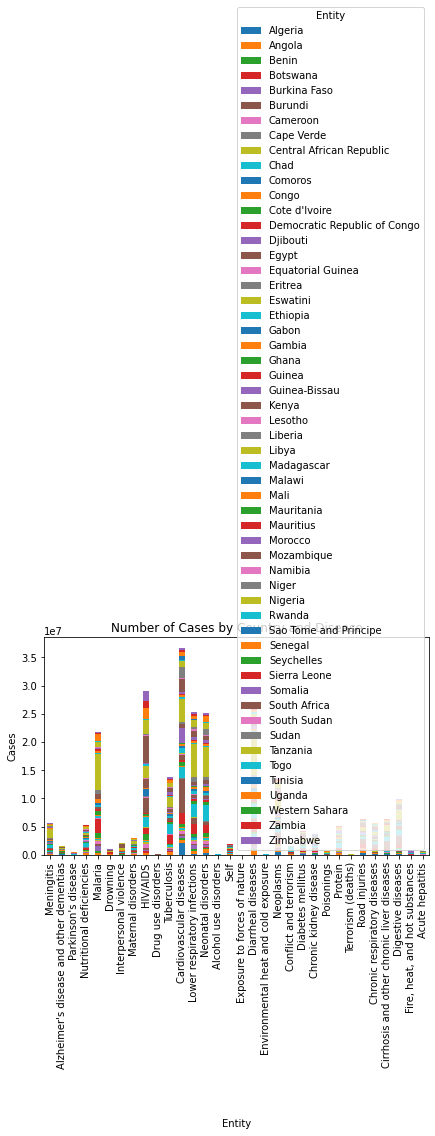

<Figure size 432x288 with 0 Axes>

In [83]:
#grouping the dataset inorder to filter out which disease has caused the most deaths in the last 10 years. 
country_deaths_cause = africa_deaths_cause.groupby("Entity", as_index=False).agg("sum").drop("Year", axis = 1) 

fig, ax = plt.subplots()
# Plot the data as a stacked bar plot
country_deaths_cause.set_index('Entity').T.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title to the plot
ax.set_xlabel('Entity', labelpad= 50) # Adjust the padding between the x-axis and x-label
ax.set_ylabel('Cases')
plt.title('Number of Cases by Country and Disease')

# Adjust the margins to create more space for the x-label
plt.subplots_adjust(left=0.01)

# Show the plot
plt.show()

plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/number_of_cases_by_country.png") #save figure

From the data above, the following are the most popular casues of death in Africa:
> **1. Cardiovascular Diseases**                
> **2. HIV/AIDS**                          
> **3. Diarrheal Diseases**                  
> **4. Lower Respiratory Infections**               
> **5. Neonatal Disorders**                 
> **6. Malaria**                      

The study will therefore explore thre from the above: (Cardiovascular Diseases; HIV/AIDS; and Malaria).

### Statistics on Death by Cardiovascular Diseases

In [84]:
africa_deaths_cause.head(3)

#Total number of Cardiovascular deaths by Country?

#Country with the lowest number of Cardiovascular Death

#Country with the highest number of Cardiovascular deaths?

#Which year had the highest number of deaths by Cardiovascular diseases in Africa by country?

#Which year had the Least number of deaths by Cardiovascular diseases in Africa by country?

#Plot a map of Africa showing the number of Cardiovascular deaths by country in various years

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
90,Algeria,DZA,1990,NaN,838.0,1337.0,439.0,453.0,9.0,1207.0,...,3559.0,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0
91,Algeria,DZA,1991,NaN,794.0,1411.0,451.0,439.0,9.0,1136.0,...,3640.0,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0
92,Algeria,DZA,1992,NaN,763.0,1494.0,470.0,427.0,12.0,1111.0,...,3687.0,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0


> Total number of Cardiovascular deaths?

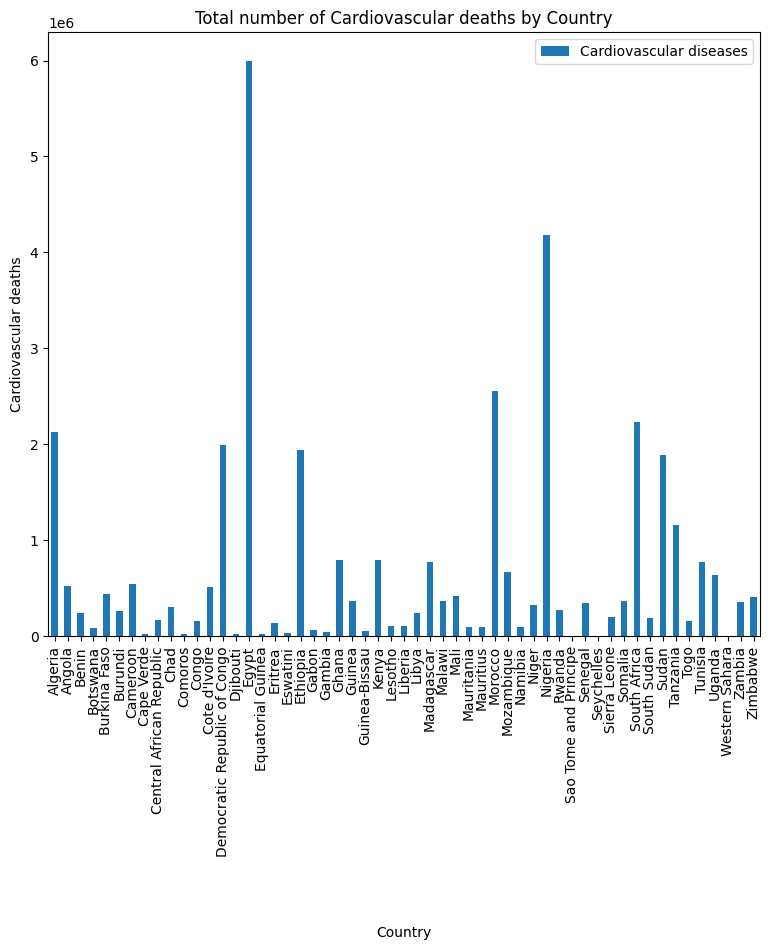

In [85]:
#Total number of Cardiovascular deaths?
country_deaths_cause = africa_deaths_cause.groupby("Entity", as_index=False).agg("sum").drop("Year", axis = 1) 
cardiovasc = country_deaths_cause[["Entity", "Cardiovascular diseases"]]

fig, ax = plt.subplots(figsize=(8,8), dpi=100)
cardiovasc.set_index('Entity').plot(kind='bar', ax=ax)
ax.set_xlabel('Country', labelpad=50)
ax.set_ylabel('Cardiovascular deaths')
ax.set_title('Total number of Cardiovascular deaths by Country')
plt.subplots_adjust(left=0.01)

# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/Cardiovascular_diseases_by_country.png") #save figure

> Country with the Highest and lowest number of Cardiovascular Deaths

In [86]:
#Country with the lowest number of Cardiovascular Death
cardiovasc.sort_values(by = "Cardiovascular diseases", ascending = False).head(10)

#next is to visualize the number of Cardiovascular deaths over time 
# africa_deaths_cause

# africa_deaths_age_group

#Country with the highest number of Cardiovascular deaths?


,Entity,Cardiovascular diseases
15,Egypt,5995471.0
38,Nigeria,4176488.0
34,Morocco,2551096.0
45,South Africa,2234693.0
0,Algeria,2123720.0
13,Democratic Republic of Congo,1989495.0
19,Ethiopia,1936154.0
47,Sudan,1887465.0
48,Tanzania,1155416.0
25,Kenya,798827.0


>> Countries with the highest and lowest number of Cardiovascular Deaths

the top 5: 

| Country | Deaths by Cardiovascular diseases|
|----------|----------|
| Egypt | 5995471.0 |  
| Nigeria | 4176488.0 |
| Morocco| 2551096.0 |
| South Africa| 2234693.0 |
| Algeria | 2123720.0 |    
.


the bottom 5:

| Country | Deaths by Cardiovascular diseases|
|----------|----------|
| Western Sahara | 0.0 |  
| Seychelles | 6339.0 |
| Sao Tome and Principe| 6589.0 |
| Djibouti| 20843.0 |
| Cape Verde | 21424.0 | 


>> Visualizing the number of Cardiovascular deaths over time

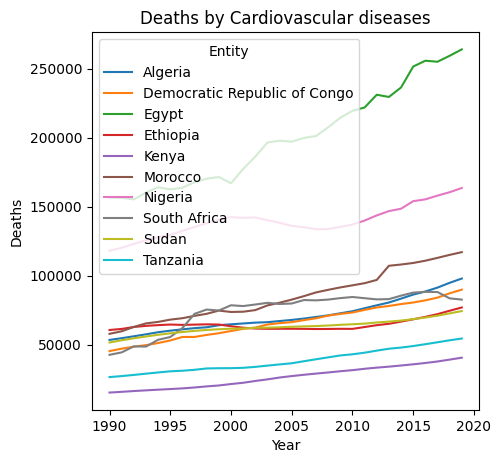

In [87]:

Country = ["Egypt", "Nigeria", "Morocco", "South Africa", "Algeria", "Democratic Republic of Congo", "Ethiopia", "Sudan", 
           "Tanzania", "Kenya"]
plot_data = africa_deaths_cause[["Entity", "Year", "Cardiovascular diseases"]][africa_deaths_cause["Entity"].isin(Country)]

# Group the data by year and country and calculate the total deaths for each group
grouped_plot = plot_data.groupby(["Year", "Entity"]).sum().reset_index()

# Pivot the data so that the countries are in columns and the years are in rows
pivot = grouped_plot.pivot(index="Year", columns="Entity", values="Cardiovascular diseases")

fig, ax = plt.subplots(figsize=(5,5), dpi=100)

# Plot the data as a line plot
pivot.plot(kind='line', ax = ax)

# Add labels and title to the plot
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths by Cardiovascular diseases")

# Show the plot
plt.show()
# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/Top_countries_dying_from_Cardiovascular_diseases.png") #save figure

In [88]:
#Which year had the highest number of deaths by Cardiovascular diseases in Africa by country?
cardiovasc_main = africa_deaths_cause[["Entity", "Code", "Year", "Cardiovascular diseases"]].groupby(["Entity"], as_index=False).agg("max") 

# cardiovasc_main[cardiovasc_main["Entity"] == "Western Sahara"].head(3)

#Output
#Year 2019 had the most deaths by country, except Western Sahara that had no record of cardiovascular deaths at all.
#However, it seems that the cardiovascular data recorded for countries in Africa were cumulative increments rather than actual deaths per year.

#visualize Western Sahara. 
africa_deaths_cause[["Entity", "Code", "Year", "Cardiovascular diseases"]][africa_deaths_cause["Entity"] == "Western Sahara"]


,Entity,Code,Year,Cardiovascular diseases
7003,Western Sahara,ESH,1992,NaN
7004,Western Sahara,ESH,2007,NaN


> Cardiovascular deaths by age group

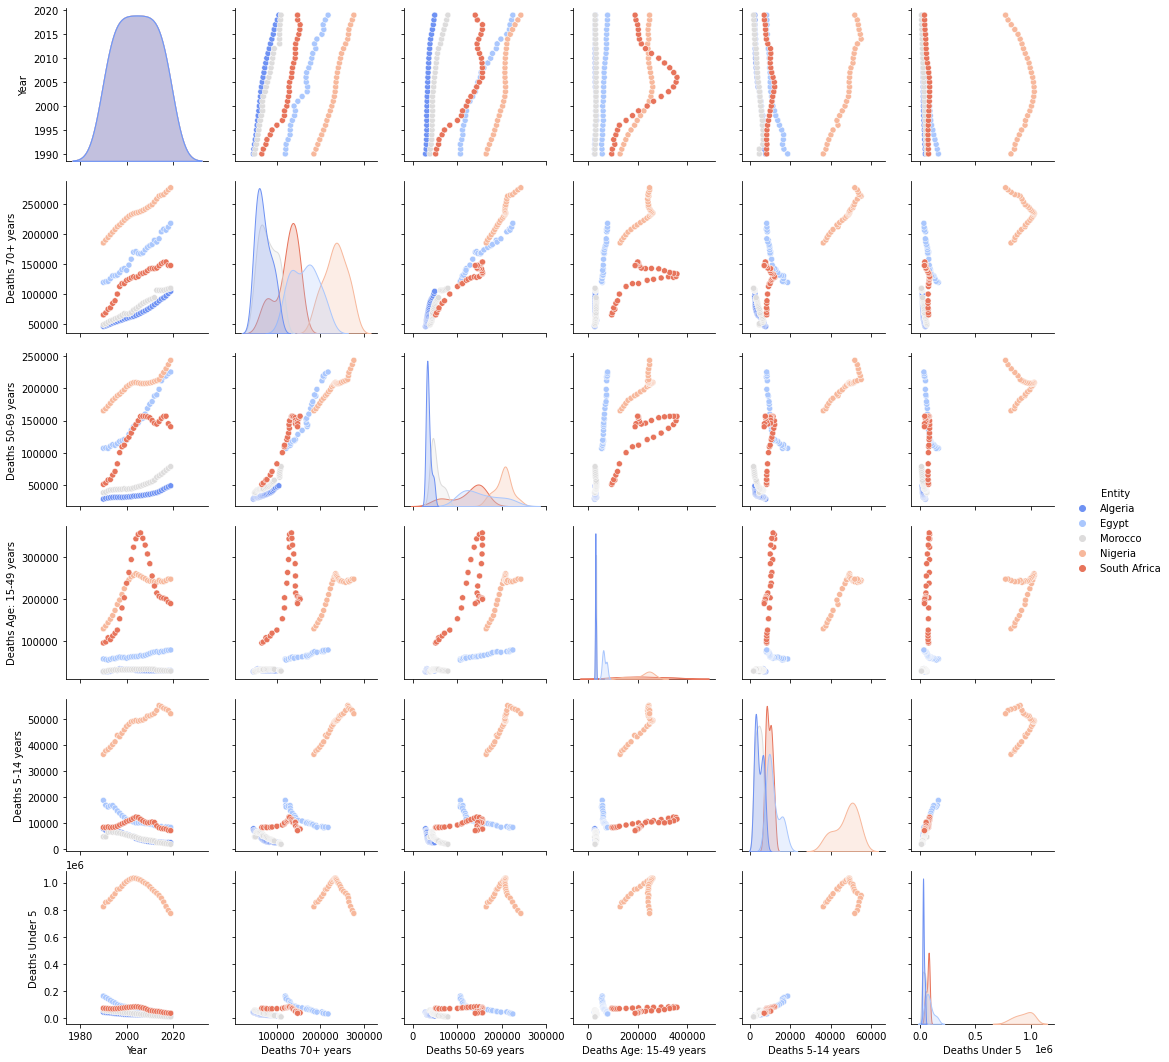

In [89]:
# Cardio Vascular deaths by age group

# africa_deaths_age_group.head(3)

#Recall that the top 5 countries with the most deaths were Egypt	5995471.0; Nigeria	4176488.0;
    #Morocco	2551096.0; South Africa	2234693.0; and Algeria	2123720.0. These will be the focus.

# Define list of focus countries
focus = ["Egypt", "Nigeria", "Morocco", "South Africa", "Algeria"]

# Filter the dataframe to contain only data for the focus countries
focus_countries = africa_deaths_age_group[africa_deaths_age_group["Entity"].isin(focus)]

def plot_deaths_by_age_group(dataframe: pd.DataFrame) -> None:
    """
    Plot Cardiovascular deaths by age group for the focus countries
    
    Args:
    dataframe: pandas DataFrame, containing the data for the focus countries
    
    Returns:
    None
    """
    # Plot the data using a seaborn pairplot
    sns.pairplot(dataframe, hue="Entity", palette="coolwarm")
    # Save the plot to disk
    plt.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/CardioVascular_deaths_by_age_group.png")

plot_deaths_by_age_group(focus_countries)

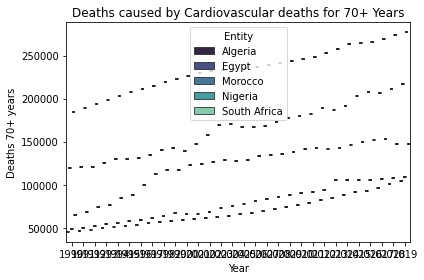

In [90]:
def plot_deaths_caused_by_cardiovascular(focus_countries: pd.DataFrame):
    """
    Plot the deaths caused by cardiovascular for 70+ years for focus countries
    
    Parameters:
    focus_countries (pd.DataFrame): DataFrame with 'Year', 'Deaths 70+ years' and 'Entity' columns

    Returns:
    None
    """
    # Get the Axes object
    ax = plt.gca()
    # Set the x-axis range
    ax.set_xlim(1990, 2020)
    # Set the number of x-axis values to display
    ax.xaxis.set_ticks([1990, 1995, 2000, 2005, 2010, 2015, 2020])
    sns.boxplot(x="Year", y="Deaths 70+ years", hue='Entity', data=focus_countries, palette='mako')
    plt.title('Deaths caused by Cardiovascular deaths for 70+ Years')

    plt.tight_layout()

plot_deaths_caused_by_cardiovascular(focus_countries)

> Plot a map of Africa showing the number of Cardiovascular deaths by country in various years

In [91]:
import plotly.express as px

# Plot a choropleth map of Africa showing the number of deaths by country and year
fig = px.choropleth(africa_deaths_cause, locations="Entity", locationmode='country names', color="Cardiovascular diseases",
                    title='Cardiovascular diseases in Africa by Country and Year', color_continuous_scale="Viridis",
                    animation_frame="Year", animation_group="Entity", hover_name="Entity",
                    height=500, width=1000, scope="africa")

# Save the plot as an animation
fig.write_html("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/africa_Cardiovascular_deaths_animation.html")

fig.show()


### Statistics on Death by HIV/AIDS

In [92]:
#Total number of HIV/AIDS deaths?

#Country with the lowest number of HIV/AIDS Death

#Country with the highest number of HIV/AIDS deaths?

#Which year had the highest number of deaths by HIV/AIDS diseases in Africa by country?

#Which year had the Least number of deaths by HIV/AIDS diseases in Africa by country?

#Plot a map of Africa showing the number of HIV/AIDS deaths by country in various years

In [93]:
country_deaths_cause.head(2)

,Entity,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,Maternal disorders,HIV/AIDS,...,Chronic kidney disease,Poisonings,Protein,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis
0,Algeria,15685.0,86914.0,22943.0,7138.0,70.0,24273.0,16702.0,29475.0,6101.0,...,154666.0,12337.0,6407.0,11066.0,369395.0,168453.0,91927.0,146527.0,27628.0,10492.0
1,Angola,110893.0,17704.0,4486.0,235181.0,317069.0,34337.0,20795.0,61545.0,244358.0,...,49080.0,14022.0,229863.0,2195.0,241350.0,101847.0,119381.0,190974.0,15712.0,14431.0


> Total number of HIV/AIDS deaths

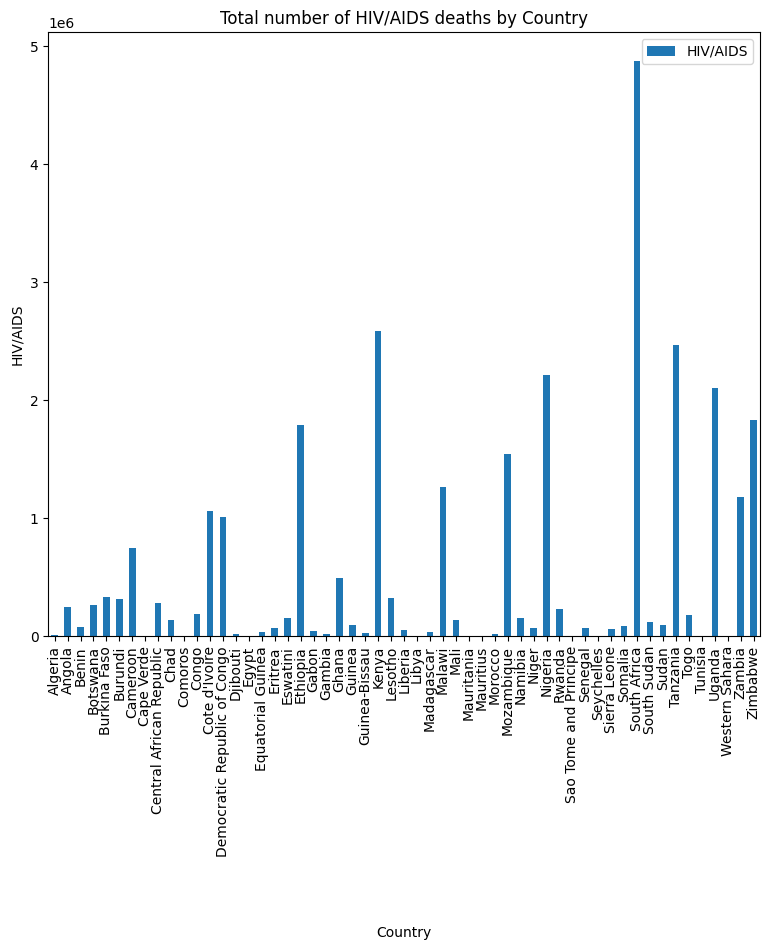

In [94]:
#Total number of Cardiovascular deaths?
# country_deaths_cause = africa_deaths_cause.groupby("Entity", as_index=False).agg("sum").drop("Year", axis = 1) 
hiv_aids = country_deaths_cause[["Entity", "HIV/AIDS"]]

fig, ax = plt.subplots(figsize=(8,8), dpi=100)
hiv_aids.set_index('Entity').plot(kind='bar', ax=ax)
ax.set_xlabel('Country', labelpad=50)
ax.set_ylabel('HIV/AIDS')
ax.set_title('Total number of HIV/AIDS deaths by Country')
plt.subplots_adjust(left=0.01)

# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/HIV_AIDS_by_country.png") #save figure

> Countries with the Highest and Lowest HIV/AIDS deaths

In [95]:
#Country with the lowest number of Cardiovascular Death
hiv_aids.sort_values(by = "HIV/AIDS", ascending = True).head(10)


,Entity,HIV/AIDS
52,Western Sahara,0.0
40,Sao Tome and Principe,12.0
10,Comoros,19.0
42,Seychelles,123.0
32,Mauritania,1142.0
33,Mauritius,1273.0
28,Libya,1352.0
50,Tunisia,2289.0
15,Egypt,2784.0
7,Cape Verde,2985.0


Top Countries with deaths by HIV/AIDS

|Country|HIV/AIDS deaths|
|-------|---------------|
|South Africa |4874296.0|
|Kenya|2583539.0|
|Tanzania|2465047.0|
|Nigeria|2216718.0|
|Uganda|2102167.0|
|Zimbabwe|1836042.0|
|Ethiopia|1788429.0|
|Mozambique|1541266.0|
|Malawi|1265348.0|
|Zambia|1175563.0|


Least Countries with deaths by HIV/AIDS

|Country|HIV/AIDS deaths|
|-------|---------------|
|Western Sahara |0|
|Sao Tome and Principe|12|
|Comoros|19|
|Seychelles|123|
|Mauritania|1142|
|Mauritius|1273|

> Visualizing the number of HIV/AIDS deaths over time

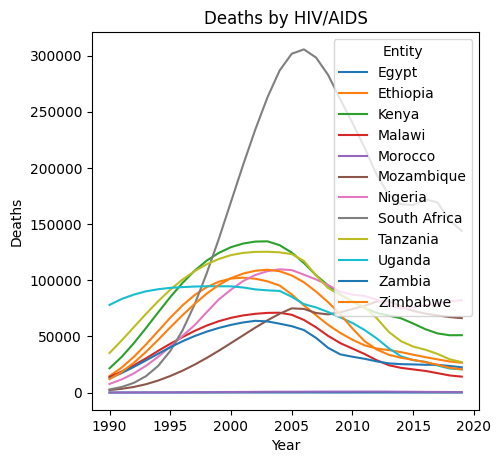

In [96]:
Country_hiv = ["Egypt", "Nigeria", "Morocco", "South Africa",  "Ethiopia", "Uganda", "Zimbabwe", "Mozambique", "Malawi", "Zambia", 
           "Tanzania", "Kenya"]
plot_data_hiv = africa_deaths_cause[["Entity", "Year", "HIV/AIDS"]][africa_deaths_cause["Entity"].isin(Country_hiv)]

# Group the data by year and country and calculate the total deaths for each group
grouped_plot_hiv = plot_data_hiv.groupby(["Year", "Entity"]).sum().reset_index()

# Pivot the data so that the countries are in columns and the years are in rows
pivot_hiv = grouped_plot_hiv.pivot(index="Year", columns="Entity", values="HIV/AIDS")

fig, ax = plt.subplots(figsize=(5,5), dpi=100)

# Plot the data as a line plot
pivot_hiv.plot(kind='line', ax = ax)

# Add labels and title to the plot
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths by HIV/AIDS")

# Show the plot
plt.show()
# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/Top_countries_dying_from_HIV_AIDS.png") #save figure


> HIV/AIDS Death by Age Group

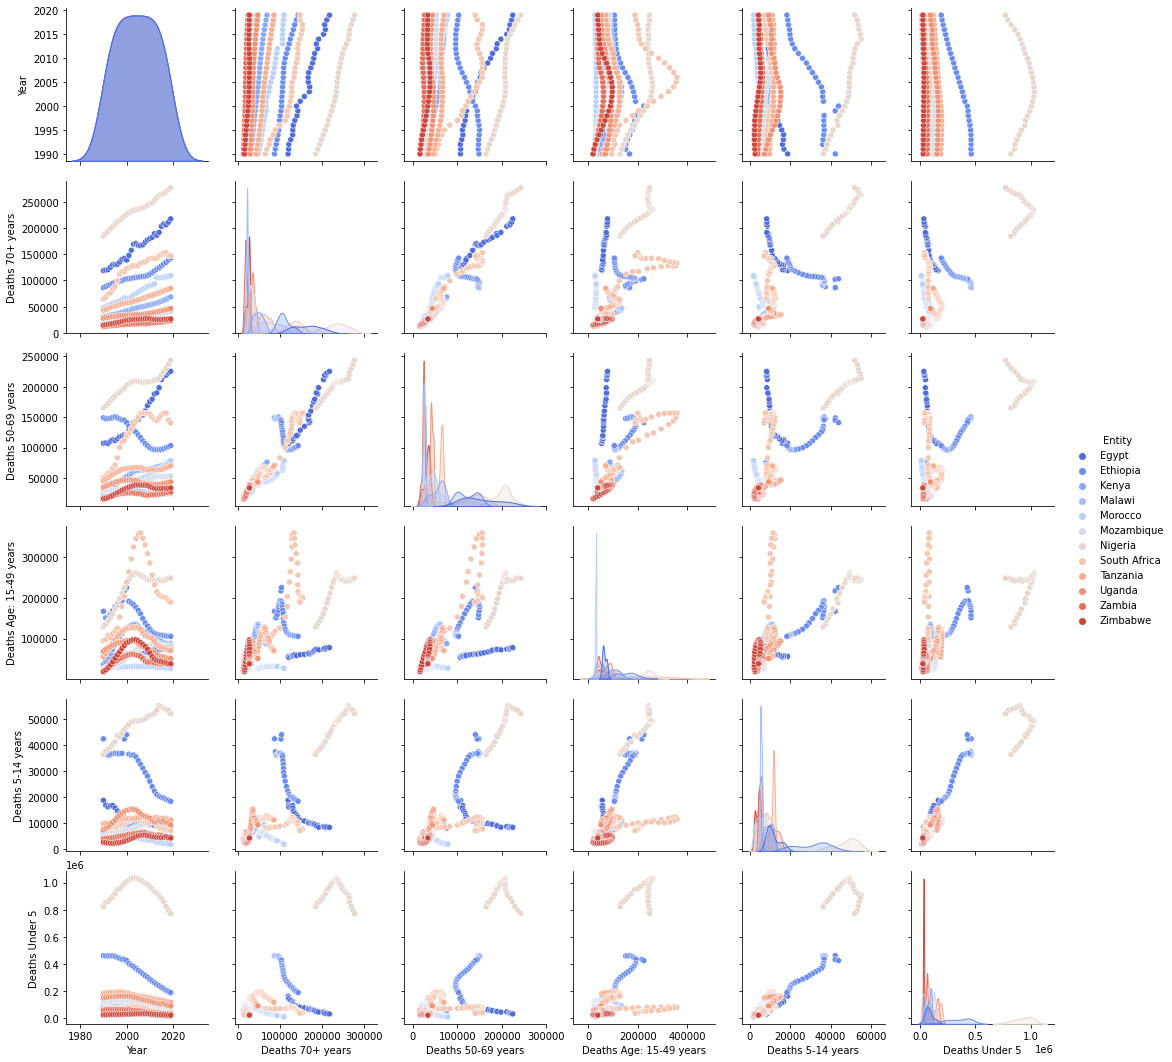

In [97]:
# HIV/AIDS deaths by age group

# Define list of focus countries
Country_hiv = ["Egypt", "Nigeria", "Morocco", "South Africa",  "Ethiopia", "Uganda", "Zimbabwe", "Mozambique", "Malawi", "Zambia", 
           "Tanzania", "Kenya"]

# Filter the dataframe to contain only data for the focus countries
focus_countries_hiv = africa_deaths_age_group[africa_deaths_age_group["Entity"].isin(Country_hiv)]

def plot_deaths_by_age_group_2(dataframe: pd.DataFrame) -> None:
    """
    Plot HIV/AIDS deaths by age group for the focus countries
    
    Args:
    dataframe: pandas DataFrame, containing the data for the focus countries
    
    Returns:
    None
    """
    # Plot the data using a seaborn pairplot
    sns.pairplot(dataframe, hue="Entity", palette="coolwarm")
    # Save the plot to disk
    plt.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/HIV_AIDS_deaths_by_age_group.png")

plot_deaths_by_age_group_2(focus_countries_hiv)

> Plot a map of Africa showing the number of HIV/AIDS deaths by country in various years

In [98]:
import plotly.express as px

# Plot a choropleth map of Africa showing the number of deaths by country and year
fig = px.choropleth(africa_deaths_cause, locations="Entity", locationmode='country names', color="HIV/AIDS",
                    title='HIV/AIDS deaths in Africa by Country and Year', color_continuous_scale="Viridis",
                    animation_frame="Year", animation_group="Entity", hover_name="Entity",
                    height=500, width=1000, scope="africa")

# Save the plot as an animation
fig.write_html("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/africa_HIV_AIDS_deaths_animation.html")

fig.show()


### Statistics on Death by Malaria

In [99]:
#Total number of malaria deaths?

#Country with the lowest number of malaria Death

#Country with the highest number of malaria deaths?

#Which year had the highest number of deaths by malaria diseases in Africa by country?

#Which year had the Least number of deaths by malaria diseases in Africa by country?

#Plot a map of Africa showing the number of malaria deaths by country in various years

> Total number of Malaria deaths




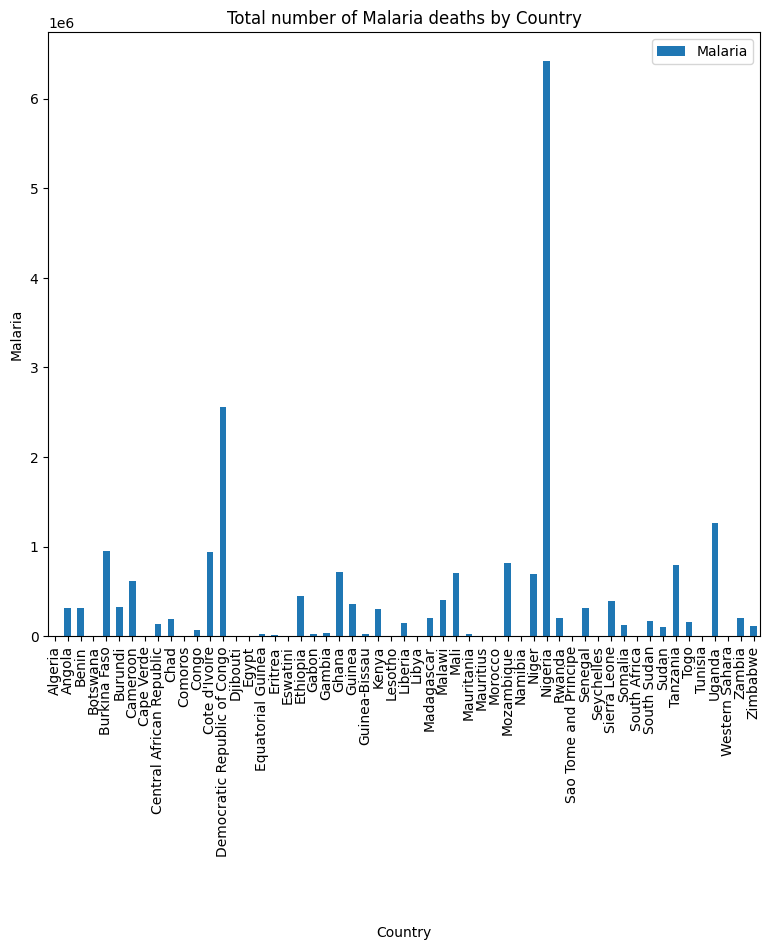

In [100]:
#Total number of Cardiovascular deaths?
# country_deaths_cause = africa_deaths_cause.groupby("Entity", as_index=False).agg("sum").drop("Year", axis = 1) 
Malaria = country_deaths_cause[["Entity", "Malaria"]]

fig, ax = plt.subplots(figsize=(8,8), dpi=100)
Malaria.set_index('Entity').plot(kind='bar', ax=ax)
ax.set_xlabel('Country', labelpad=50)
ax.set_ylabel('Malaria')
ax.set_title('Total number of Malaria deaths by Country')
plt.subplots_adjust(left=0.01)

# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/Malaria_by_country.png") #save figure

> Countries with the Highest and Lowest HIV/AIDS deaths

In [101]:
#Country with the lowest number of Cardiovascular Death
Malaria.sort_values(by = "Malaria", ascending = False).head(10)


,Entity,Malaria
38,Nigeria,6422063.0
13,Democratic Republic of Congo,2557219.0
51,Uganda,1265629.0
4,Burkina Faso,950762.0
12,Cote d'Ivoire,941597.0
35,Mozambique,817948.0
48,Tanzania,800490.0
22,Ghana,721339.0
31,Mali,711087.0
37,Niger,693962.0


Top Countries with deaths by Malaria

|Country|HIV/AIDS deaths|
|-------|---------------|
|Nigeria |6422063.0|
|Democratic Republic of Congo|2557219.0|
|Uganda|2557219.0|
|Burkina Faso|950762.0|
|Cote d'Ivoire|941597.0|
|Mozambique|817948.0|
|Tanzania|800490.0|
|Ghana|721339.0|
|Mali|711087.0|
|Niger|693962.0|


Least Countries with deaths by Malaria

|Country|HIV/AIDS deaths|
|-------|---------------|
|Western Sahara |0|
|Morocco|0|
|Tunisia|0|
|Libya|0|
|Egypt|0|

> Visualizing the number of Malaria deaths over time

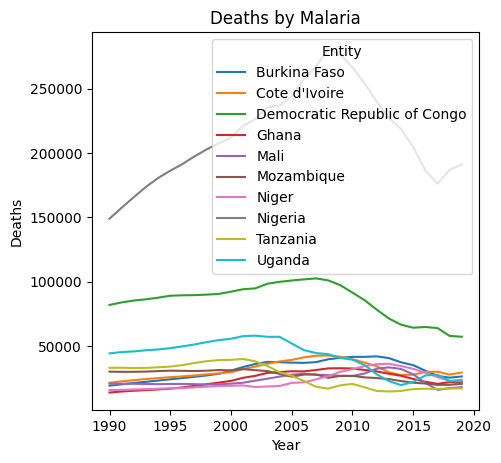

In [102]:
Country_malaria = ["Nigeria",  "Democratic Republic of Congo",  "Uganda", "Burkina Faso", "Cote d'Ivoire", 
             "Mozambique", "Ghana", "Mali", "Niger","Tanzania"]
plot_data_malaria = africa_deaths_cause[["Entity", "Year", "Malaria"]][africa_deaths_cause["Entity"].isin(Country_malaria)]

# Group the data by year and country and calculate the total deaths for each group
grouped_plot_malaria = plot_data_malaria.groupby(["Year", "Entity"]).sum().reset_index()

# Pivot the data so that the countries are in columns and the years are in rows
pivot_malaria = grouped_plot_malaria.pivot(index="Year", columns="Entity", values="Malaria")

fig, ax = plt.subplots(figsize=(5,5), dpi=100)

# Plot the data as a line plot
pivot_malaria.plot(kind='line', ax = ax)

# Add labels and title to the plot
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths by Malaria")

# Show the plot
plt.show()
# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/Top_countries_dying_from_Malaria.png") #save figure


> Malaria Death by Age Group

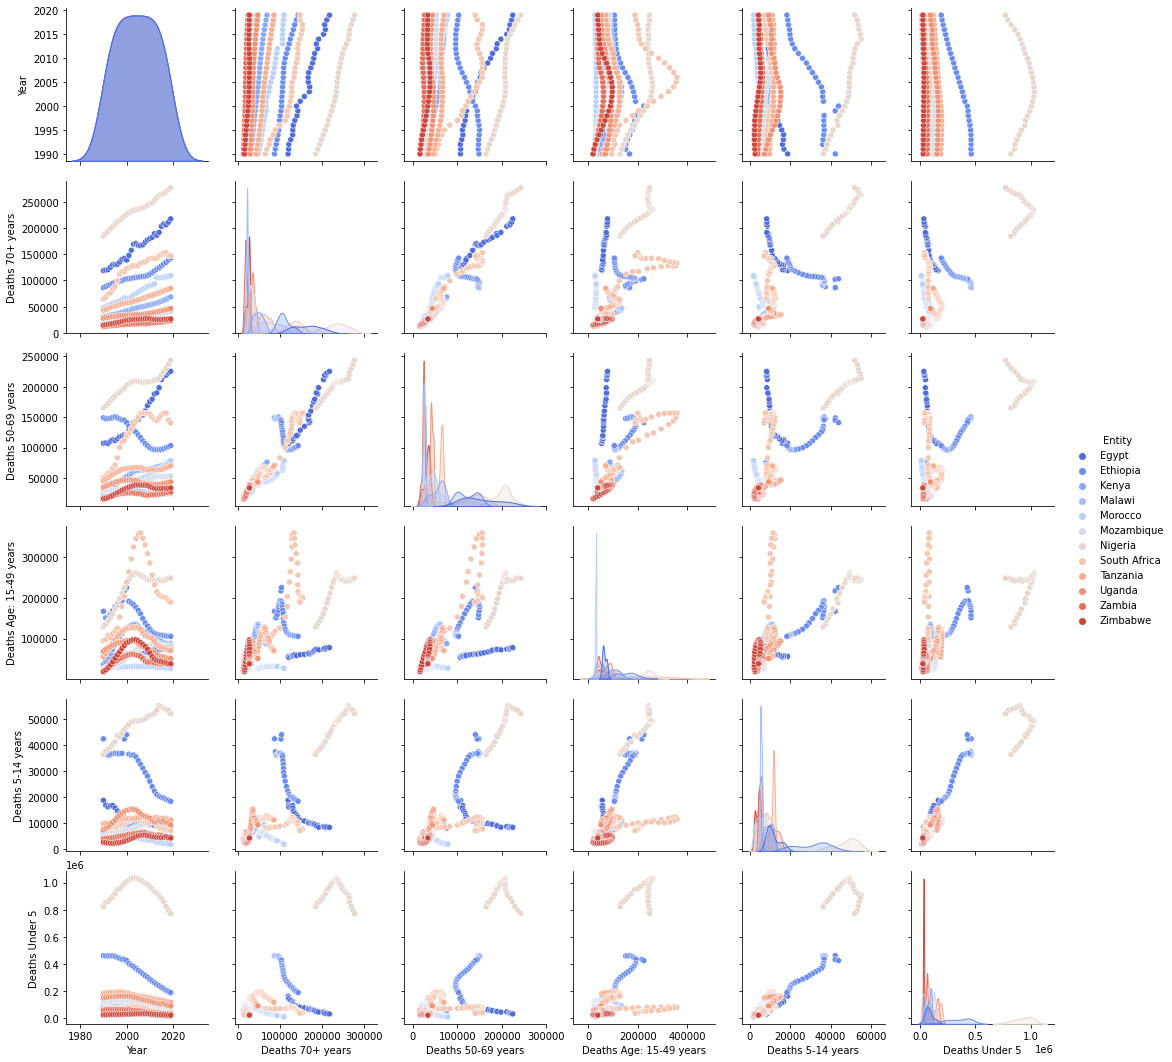

In [103]:
# HIV/AIDS deaths by age group

# Define list of focus countries
Country_malaria = ["Egypt", "Nigeria", "Morocco", "South Africa",  "Ethiopia", "Uganda", "Zimbabwe", "Mozambique", "Malawi", "Zambia", 
           "Tanzania", "Kenya"]

# Filter the dataframe to contain only data for the focus countries
focus_countries_malaria = africa_deaths_age_group[africa_deaths_age_group["Entity"].isin(Country_malaria)]

def plot_deaths_by_age_group_malaria(dataframe: pd.DataFrame) -> None:
    """
    Plot Malaria deaths by age group for the focus countries
    
    Args:
    dataframe: pandas DataFrame, containing the data for the focus countries
    
    Returns:
    None
    """
    # Plot the data using a seaborn pairplot
    sns.pairplot(dataframe, hue="Entity", palette="coolwarm")
    # Save the plot to disk
    plt.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/malaria_deaths_by_age_group.png")

plot_deaths_by_age_group_malaria(focus_countries_malaria)

> Plot a map of Africa showing the number of Malaria deaths by country in various years

In [104]:
import plotly.express as px

# Plot a choropleth map of Africa showing the number of deaths by country and year
fig = px.choropleth(africa_deaths_cause, locations="Entity", locationmode='country names', color="Malaria",
                    title='Malaria deaths in Africa by Country and Year', color_continuous_scale="Viridis",
                    animation_frame="Year", animation_group="Entity", hover_name="Entity",
                    height=500, width=1000, scope="africa")

# Save the plot as an animation
fig.write_html("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/africa_Malaria_deaths_animation.html")

fig.show()


### Statistics on Medical Doctors in the Affected Countries

> For Cardiovascular Diseases

In [105]:
Country = ["Egypt", "Nigeria", "Morocco", "South Africa", "Algeria", "Democratic Republic of Congo", "Ethiopia", "Sudan", 
           "Tanzania", "Kenya"]

#medical doctors
df_medical_doctors.head(4)
doct_cardio = df_medical_doctors[["Indicator", "Location", "Period", "Value"]][df_medical_doctors["Location"].isin(Country)]

# convert the column from string to float
doct_cardio["Value"] = pd.to_numeric(doct_cardio["Value"], errors='coerce')
doct_cardio["Value"].dtype

dtype('float64')

>> Visualize number of doctors available in the countries with the top cardiovascular deaths

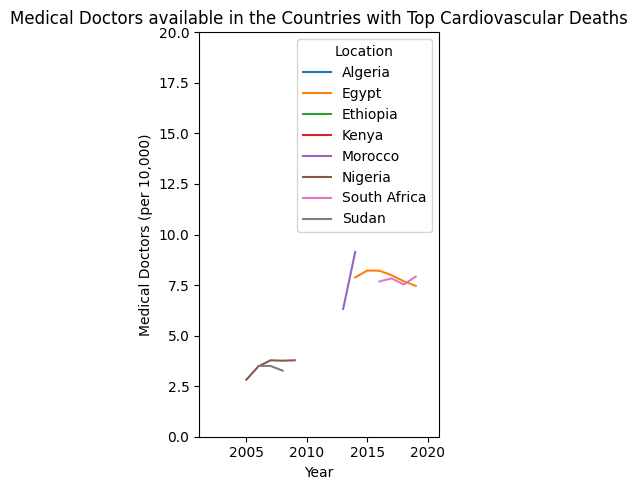

In [107]:
# plot_doctor_cardiovasc = africa_deaths_cause[["Entity", "Year", "Malaria"]][africa_deaths_cause["Entity"].isin(Country_malaria)]

# Group the data by year and country and calculate the total deaths for each group
grouped_doc_cardiovas = doct_cardio.groupby(["Period", "Location"]).sum().reset_index()

# Pivot the data so that the countries are in columns and the years are in rows
pivot_doc_cardiovas = grouped_doc_cardiovas.pivot(index="Period", columns="Location", values="Value")
# pivot_doc_cardiovas.drop(["Kenya", "Ethiopia", "Sudan"], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
ax.set_ylim([0, 20])
# Plot the data as a line plot
pivot_doc_cardiovas.plot(kind='line', ax = ax)

# Add labels and title to the plot
plt.xlabel("Year")
plt.ylabel("Medical Doctors (per 10,000)")
plt.title("Medical Doctors available in the Countries with Top Cardiovascular Deaths")

# Show the plot
plt.tight_layout()
# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/Medical_Doctors_Cardiovascular.png") #save figure


The average number of doctors per 10,000 people can vary greatly depending on various factors such as the country, region, or type of healthcare system. According to World Health Organization data from 2020, the average number of doctors per 10,000 people across the world is around 8.
                                                         
                                              
From the data above, it can be seen that even though these countries have some of the top cardiovascular deaths, they also have large number of doctors per 10,000 people. Asides Nigeria (with an average of 3 doctors per 10,000 people), the rest of the countries with top cardiovascular deaths (Egypt, Algeria, Morocco, South Africa etc.), all have at least 7 medical doctors per 10,000 people. The issue therefore lies not in the availability of medical doctors, but in the wordclass medical facilities, government intervention, and the right strategies to combat cardiovascular diseases.
                                        
                                           
NB: it is worth noting that the availability of doctors is not equally distributed globally. For example, developed countries generally have more doctors per 10,000 people than developing countries. In addition, some countries with well-developed healthcare systems may have more than 20 doctors per 10,000 people, while other countries may have fewer than 3.

> For HIV/AIDS

In [108]:
Country_hiv = ["Egypt", "Nigeria", "Morocco", "South Africa",  "Ethiopia", "Uganda", "Zimbabwe", "Mozambique", "Malawi", "Zambia", 
           "Tanzania", "Kenya"]

#medical doctors
df_medical_doctors.head(4)
doct_hiv = df_medical_doctors[["Indicator", "Location", "Period", "Value"]][df_medical_doctors["Location"].isin(Country_hiv)]

# convert the column from string to float
doct_hiv["Value"] = pd.to_numeric(doct_hiv["Value"], errors='coerce')
doct_hiv["Value"].dtype

dtype('float64')

>> Visualize number of doctors available in the countries with the top cardiovascular deaths

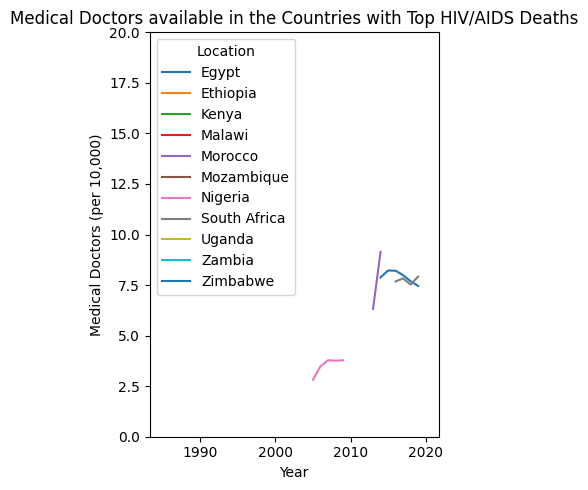

In [110]:
# plot_doctor_cardiovasc = africa_deaths_cause[["Entity", "Year", "Malaria"]][africa_deaths_cause["Entity"].isin(Country_malaria)]

# Group the data by year and country and calculate the total deaths for each group
grouped_doc_hiv = doct_hiv.groupby(["Period", "Location"]).sum().reset_index()

# Pivot the data so that the countries are in columns and the years are in rows
pivot_doc_hiv = grouped_doc_hiv.pivot(index="Period", columns="Location", values="Value")

fig, ax = plt.subplots(figsize=(5,5), dpi=100)
ax.set_ylim([0, 20])
# Plot the data as a line plot
pivot_doc_hiv.plot(kind='line', ax = ax)

# Add labels and title to the plot
plt.xlabel("Year")
plt.ylabel("Medical Doctors (per 10,000)")
plt.title("Medical Doctors available in the Countries with Top HIV/AIDS Deaths")

# Show the plot
plt.tight_layout()
# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/Medical_Doctors_HIV_AIDS.png") #save figure


> For Malaria

In [111]:
Country_malaria = ["Nigeria",  "Democratic Republic of Congo",  "Uganda", "Burkina Faso", "Cote d'Ivoire", 
             "Mozambique", "Ghana", "Mali", "Niger","Tanzania"]

#medical doctors
df_medical_doctors.head(4)
doct_malaria = df_medical_doctors[["Indicator", "Location", "Period", "Value"]][df_medical_doctors["Location"].isin(Country_malaria)]

# convert the column from string to float
doct_malaria["Value"] = pd.to_numeric(doct_malaria["Value"], errors='coerce')
doct_malaria["Value"].dtype

dtype('float64')

>> Visualize number of doctors available in the countries with the top cardiovascular deaths

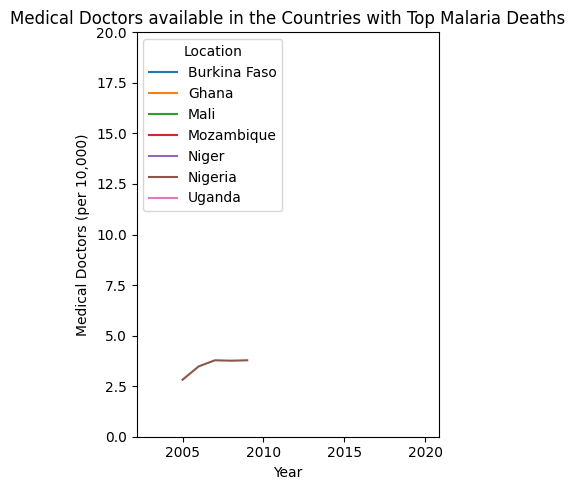

In [112]:
# Group the data by year and country and calculate the total deaths for each group
grouped_doc_malaria = doct_malaria.groupby(["Period", "Location"]).sum().reset_index()

# Pivot the data so that the countries are in columns and the years are in rows
pivot_doc_malaria = grouped_doc_malaria.pivot(index="Period", columns="Location", values="Value")

fig, ax = plt.subplots(figsize=(5,5), dpi=100)
ax.set_ylim([0, 20])
# Plot the data as a line plot
pivot_doc_malaria.plot(kind='line', ax = ax)

# Add labels and title to the plot
plt.xlabel("Year")
plt.ylabel("Medical Doctors (per 10,000)")
plt.title("Medical Doctors available in the Countries with Top Malaria Deaths")

# Show the plot
plt.tight_layout()
# plt.clf()
fig.savefig("/content/drive/My Drive/Project 2 - Africa Health Analytics/My project/Images/Medical_Doctors_Malaria.png") #save figure


In [113]:
pip freeze > requirements.txt


### Summary

The study surveyed a dataset containing records of deaths caused by numerous diseases asound the world. The analysis which was centered on Africa showed that of all the diseases recorded, six (6) were some of the most popular causes of death in Africa. They include:
1. **Cardiovascular Diseases**
2. **HIV/AIDS**
3. **Diarrheal Diseases**
4. **Lower Respiratory Infections**
5. **Neonatal Disorders**
6. **Malaria**

The study therefore reviewed three of these causes (Cardiovascular diseases, HIV/AIDS, Malaria) etc. 

|Cardiovascular Diseases|HIV/AIDS|Malaria|
|---------|---------|---------|
|Egypt - 5995471.0|South Africa	- 4874296.0|Nigeria	- 6422063.0|
|Nigeria - 4176488.0|Kenya -	2583539.0|Democratic Republic of Congo	- 2557219.0|
|Morocco - 2551096.0|Tanzania	- 2465047.0|Uganda	- 2557219.0|
|South Africa - 2234693.0|Nigeria	- 2216718.0|Burkina Faso -	950762.0|
|Algeria - 2123720.0|Uganda	- 2102167.0|Cote d'Ivoire	- 941597.0|

The study also visualized the increment in the number of deaths caused by these three diseases from 1990 to 2019 using both a line plot and a chloropleth map. 

The average number of doctors per 10,000 people can vary greatly depending on various factors such as the country, region, or type of healthcare system. According to World Health Organization data from 2020, the average number of doctors per 10,000 people across the world is around 8.

From the data above, it can be seen that even though these countries have some of the top deaths caused by cardiovascular diseases, HIV/AIDS, and Malaria, they also have large number of doctors per 10,000 people. Asides Nigeria (with an average of 3-4 doctors per 10,000 people), the rest of the countries all have at least 7 medical doctors per 10,000 people. The issue therefore lies not in the availability of medical doctors, but could be the availability of wordclass medical facilities, government intervention, and the right strategies to combat these diseases.

